In [1]:
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from astropy.io import fits
from astropy.utils.data import download_file

import os
import glob
import time
from matplotlib.colors import LogNorm
from IPython import display
from IPython.display import clear_output
import random

plt.rcParams.update({'font.size':15})

Filename: 4-3 Calibration\Dark\Dark_1_secs_002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3520)   int16 (rescales to uint16)   


<class 'numpy.ndarray'>
(3520, 4656)
<class 'numpy.ndarray'>
(3520, 4656)
Min: 16
Max: 3136
Mean: 131.27254568884723
Stdev: 27.273467942061107


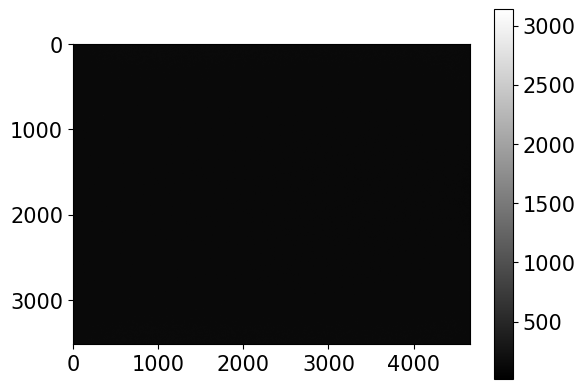

In [2]:
#Opening and testing data

image_data = "4-3 Calibration\\Dark\\Dark_1_secs_002.fits"

hdu_list = fits.open(image_data)
hdu_list.info()

image_data = hdu_list[0].data

print(type(image_data))
print(image_data.shape)

hdu_list.close()

print(type(image_data))
print(image_data.shape)

plt.imshow(image_data, cmap='gray')
plt.colorbar()

print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

In [3]:
image_list = []
n = 0

#dark
filepath = "4-3 Calibration\\Dark\\"


for file in glob.glob(filepath+"Dark*.fits"):
    image_list.append(file)
    n=n+1
print("\n".join(image_list))

4-3 Calibration\Dark\Dark_1_secs_001.fits
4-3 Calibration\Dark\Dark_1_secs_002.fits
4-3 Calibration\Dark\Dark_1_secs_003.fits
4-3 Calibration\Dark\Dark_1_secs_004.fits
4-3 Calibration\Dark\Dark_1_secs_005.fits


In [4]:
image_concat = []

image_concat = [fits.getdata(image) for image in image_list]

hdu_number = 0 # HDU means header data unit
image_hdr = [fits.getheader(image, hdu_number) for image in image_list]

In [5]:
N_images = np.shape(image_concat)
print(N_images) #shape of array, imagex X y-pixels X x-pixels
print(N_images[0]) #number of images

image_concat[0]

(5, 3520, 4656)
5


array([[ 80, 128, 112, ..., 144, 192, 112],
       [ 80, 128,  32, ..., 160, 224,  64],
       [160, 160, 176, ..., 192, 160, 144],
       ...,
       [128, 144, 112, ...,  80, 160,  96],
       [128, 128, 128, ..., 144, 176,  96],
       [ 64, 128, 192, ...,  96, 176,  96]], dtype=uint16)

In [6]:
for i in range(N_images[0]):
    image_concat[i] = image_concat[i] /16

In [7]:
""""
masterbias_image = fits.getdata(biasfilepath)

plt.figure(figsize=(15,6))

N_std = 1.5

print('Min:', np.min(masterbias_image) )
print('Max:', np.max(masterbias_image)  )    
print('Mean:', np.mean(masterbias_image)  )
print('Median', np.median(masterbias_image)  )
print('Stdev:', np.std(masterbias_image)  )

plt.subplot(1,2,1)
plt.imshow(masterbias_image, cmap='gray', 
               vmin= np.median(masterbias_image) - N_std*np.std(masterbias_image), vmax=np.median(masterbias_image) + N_std*np.std(masterbias_image)) 
plt.title("Master Bias")
plt.colorbar()


plt.subplot(1,2,2)
plt.hist(masterbias_image.flatten(),bins=int(np.max(masterbias_image)))
plt.yscale('log')
  
plt.show()

"""

'"\nmasterbias_image = fits.getdata(biasfilepath)\n\nplt.figure(figsize=(15,6))\n\nN_std = 1.5\n\nprint(\'Min:\', np.min(masterbias_image) )\nprint(\'Max:\', np.max(masterbias_image)  )    \nprint(\'Mean:\', np.mean(masterbias_image)  )\nprint(\'Median\', np.median(masterbias_image)  )\nprint(\'Stdev:\', np.std(masterbias_image)  )\n\nplt.subplot(1,2,1)\nplt.imshow(masterbias_image, cmap=\'gray\', \n               vmin= np.median(masterbias_image) - N_std*np.std(masterbias_image), vmax=np.median(masterbias_image) + N_std*np.std(masterbias_image)) \nplt.title("Master Bias")\nplt.colorbar()\n\n\nplt.subplot(1,2,2)\nplt.hist(masterbias_image.flatten(),bins=int(np.max(masterbias_image)))\nplt.yscale(\'log\')\n  \nplt.show()\n\n'

In [8]:
"""
for i in range(N_images[0]):
    image_concat[i] = image_concat[i] - masterbias_image
"""

'\nfor i in range(N_images[0]):\n    image_concat[i] = image_concat[i] - masterbias_image\n'

In [9]:
image_hdr[0]

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4656 / length of data axis 1                          
NAXIS2  =                 3520 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
ROWORDER= 'TOP-DOWN'           / Row Order                                      
INSTRUME= 'ZWO CCD ASI1600MM Pro' / CCD Name                                    
TELESCOP= 'SynScan '        

In [10]:
for n in range(N_images[0]):
    camera_temp = image_hdr[n]["CCD-TEMP"]
    print('Camera temp = ',str(camera_temp), ' C')

Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -19.5  C


In [11]:
for n in range(N_images[0]):
    exposure = image_hdr[n]["EXPTIME "]
    print('Dark Exposure time= ',str(exposure))

Dark Exposure time=  1.0
Dark Exposure time=  1.0
Dark Exposure time=  1.0
Dark Exposure time=  1.0
Dark Exposure time=  1.0


In [12]:
image_min = np.zeros(N_images[0])
image_max = np.zeros(N_images[0])
image_mean = np.zeros(N_images[0])
image_median = np.zeros(N_images[0])
image_stdev = np.zeros(N_images[0])

4-3 Calibration\Dark\Dark_1_secs_005.fits
Min: 1.0
Max: 195.0
Mean: 8.205491753065449
Median 8.0
Stdev: 1.7049110027015975


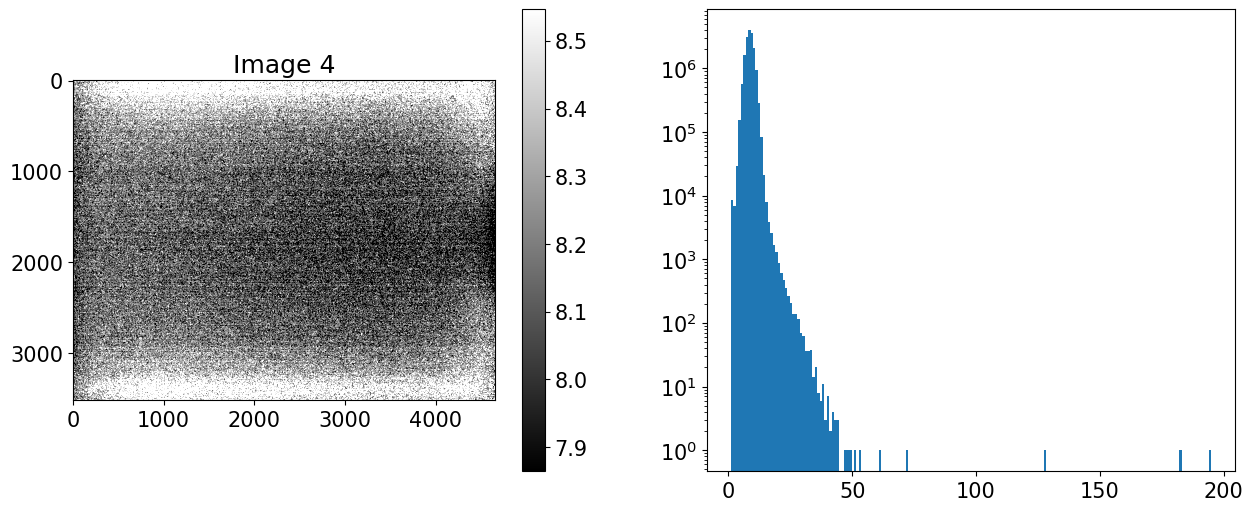

In [13]:
N_std = 0.2


for i in range(N_images[0]):
    clear_output(wait=True)

    plt.figure(figsize=(15,6))
    
    print(image_list[i])
    image_min[i] = np.min(image_concat[i])
    image_max[i] = np.max(image_concat[i])
    image_mean[i] = np.mean(image_concat[i])
    image_median[i] = np.median(image_concat[i])
    image_stdev[i] = np.std(image_concat[i])

    
    
    print('Min:', image_min[i] )
    print('Max:', image_max[i] )    
    print('Mean:', image_mean[i] )
    print('Median', image_median[i] )
    print('Stdev:', image_stdev[i] )


    
    plt.subplot(1,2,1)
    plt.imshow(image_concat[i], cmap='gray', 
               vmin= image_mean[i] - N_std*image_stdev[i], vmax=image_mean[i] + N_std*image_stdev[i]) 
    plt.title("Image "+ str(i))
    plt.colorbar()


    plt.subplot(1,2,2)
    plt.hist(image_concat[i].flatten(),bins=int(image_max[i]))
    plt.yscale('log')
  
    plt.show()
    
    time.sleep(1) #pause in secs. Make bigger if you need.


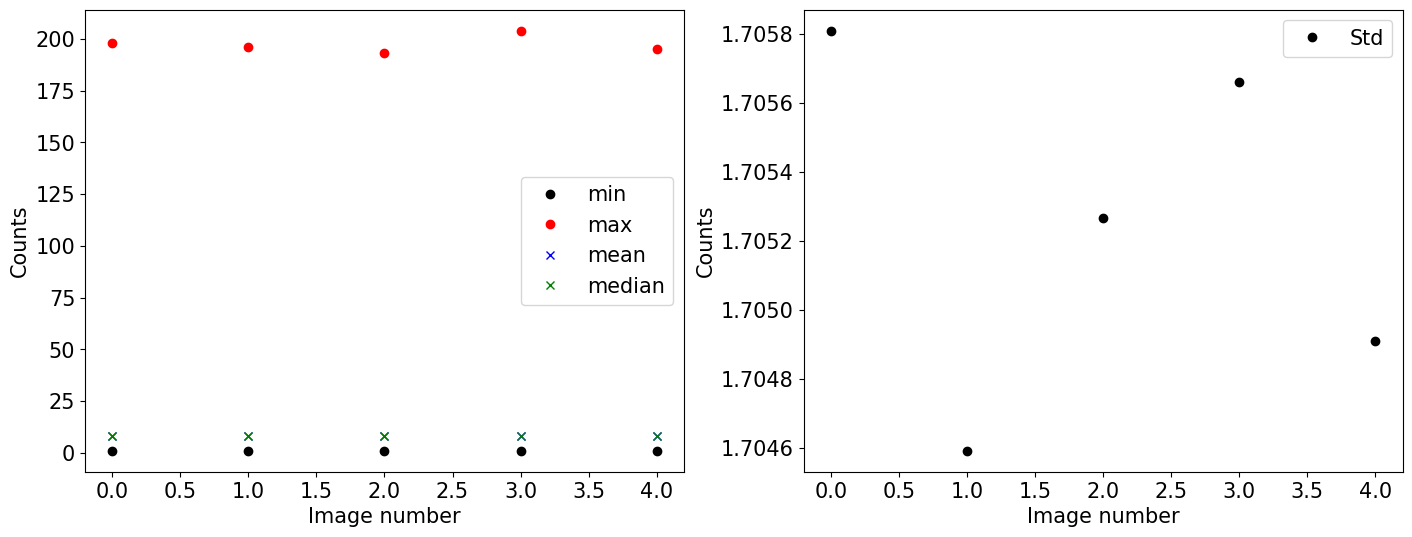

In [14]:
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
plt.plot(image_min,'ko',label='min')
plt.plot(image_max,'ro',label='max')
plt.plot(image_mean, 'bx', label='mean')
plt.plot(image_median,'gx',label='median')

plt.xlabel('Image number')
plt.ylabel('Counts')

plt.legend()


plt.subplot(1,2,2)
plt.plot(image_stdev,'ko',label='Std')

plt.xlabel('Image number')
plt.ylabel('Counts')

plt.legend()



plt.show()



In [15]:
all_data = np.zeros(N_images)
for i in range(N_images[0]):
    all_data[i,:,:] = image_concat[i]

In [16]:
NyPix = np.shape(all_data)[1]
NxPix = np.shape(all_data)[2]
print(NxPix,NyPix)

4656 3520


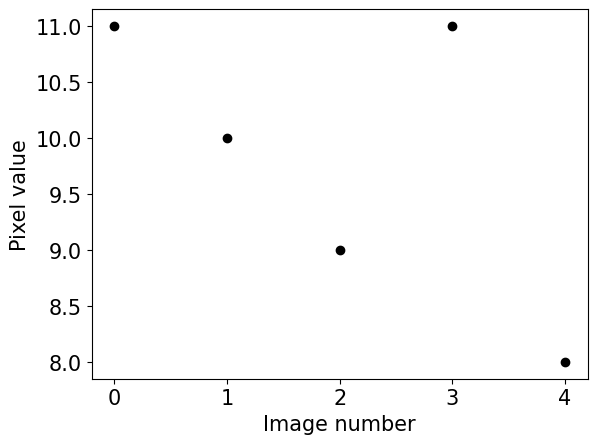

In [17]:
x = int(random.randint(1, NxPix))
y = int(random.randint(1, NyPix))

plt.plot(all_data[:,y,x],'ko' )

plt.xlabel('Image number')
plt.ylabel('Pixel value')

plt.show()

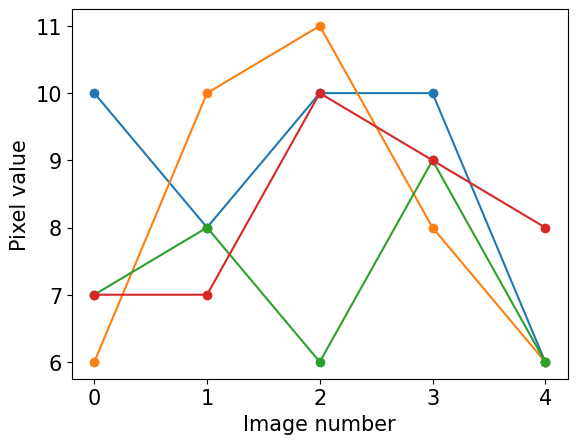

In [18]:
x_list = np.zeros(4)
y_list =  np.zeros(4)
x_list = [random.randint(1, NxPix),random.randint(1, NxPix),random.randint(1, NxPix),random.randint(1, NxPix)]
y_list = [random.randint(1, NyPix),random.randint(1, NyPix),random.randint(1, NyPix),random.randint(1, NyPix)]

for i in range(4):
    plt.plot(all_data[:,y_list[i],x_list[i]],'-o')



plt.xlabel('Image number')
plt.ylabel('Pixel value')

plt.show()

In [19]:
pixels_std = np.std(all_data, axis=0)

In [20]:
np.shape(pixels_std)

(3520, 4656)

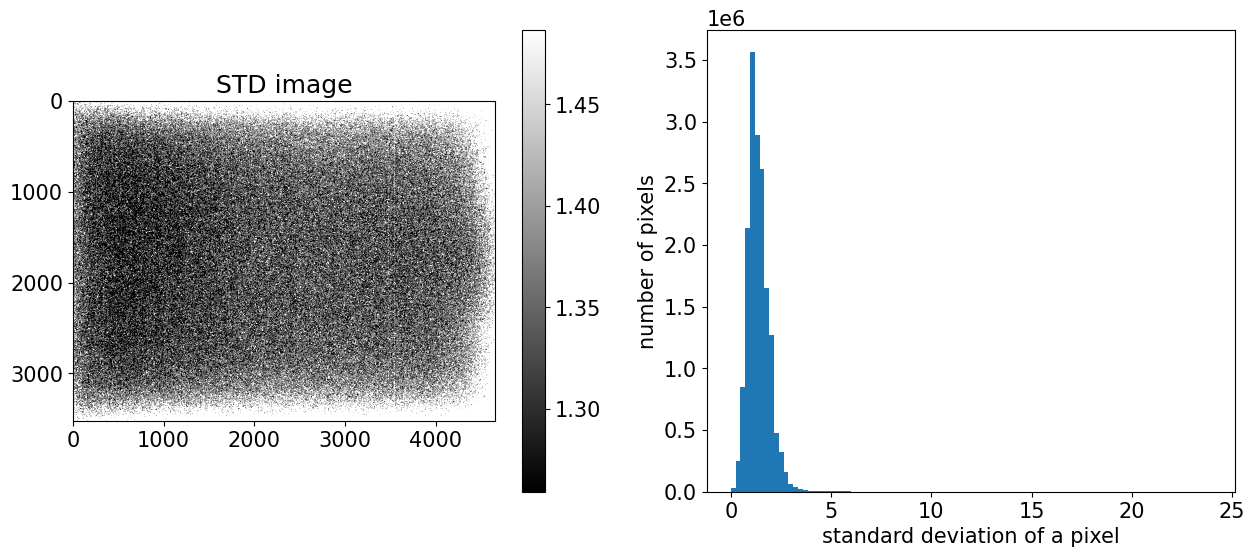

In [21]:
plt.figure(figsize=(15,6))

std_mean = np.mean(pixels_std)
std_std = np.std(pixels_std)

plt.subplot(1,2,1)
plt.imshow(pixels_std, cmap='gray',
           vmin= std_mean - N_std*std_std, vmax=std_mean + N_std*std_std)
plt.title("STD image")
plt.colorbar()

plt.subplot(1,2,2)
plt.hist(pixels_std.flatten(),bins=100)
plt.xlabel('standard deviation of a pixel')
plt.ylabel('number of pixels')


plt.show()

In [22]:
Uncertainty_dark = np.median(pixels_std)
print(Uncertainty_dark)

1.32664991614216


In [23]:
print('Dark uncertainty: {0:.2f} counts'.format(Uncertainty_dark))

Dark uncertainty: 1.33 counts


In [24]:
master_dark = np.median(all_data, axis=0)

Min: 1.0
Max: 196.0
Mean: 8.189701216416745
Median 8.0
Stdev: 0.9855983376876107
Total sum: 134221996.0


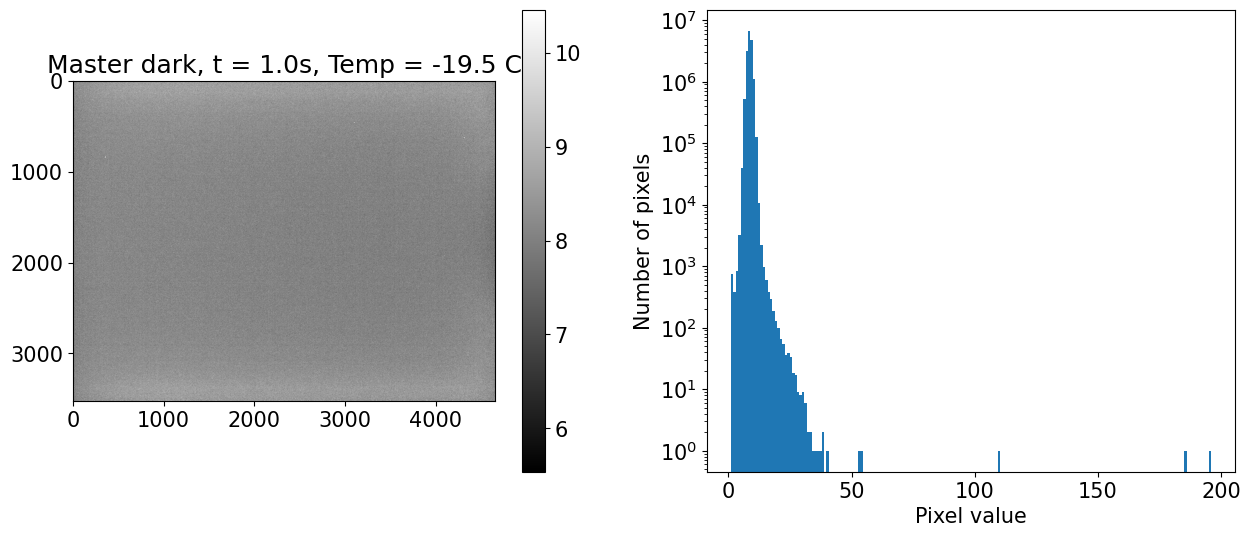

In [25]:
plt.figure(figsize=(15,6))
            
    
N_std = 2.5
    
print('Min:', np.min(master_dark) )
print('Max:', np.max(master_dark)  )    
print('Mean:', np.mean(master_dark)  )
print('Median', np.median(master_dark)  )
print('Stdev:', np.std(master_dark)  )
print('Total sum:',np.sum(master_dark))


    
plt.subplot(1,2,1)
plt.imshow(master_dark, cmap='gray', 
               vmin= np.median(master_dark) - N_std*np.std(master_dark), vmax=np.median(master_dark) + N_std*np.std(master_dark)) 
plt.title('Master dark, t = '+str(exposure)+'s, Temp = '+str(camera_temp)+' C' )
plt.colorbar()


plt.subplot(1,2,2)
plt.hist(master_dark.flatten(),bins= int(np.max(master_dark)))
plt.yscale('log')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
  
plt.show()
    


In [26]:
outfile = filepath+'master_dark.fits'

hdu = fits.PrimaryHDU(master_dark)
hdu.writeto(outfile, overwrite=True)

In [27]:
image_list.append(filepath+'std_image')
image_list.append(filepath+'master_dark.fits')

df_stats['filename'] = image_list

NameError: name 'df_stats' is not defined

In [ ]:
camera_temp = []
exposure = []
camera_filter = []

FILTER  = 'Luminance'

for n in range(N_images[0]):
    camera_temp.append(image_hdr[n]["CCD-TEMP"])
    exposure.append(image_hdr[n]["EXPTIME "])
    camera_filter.append(image_hdr[n]["FILTER "])

# need to do something for the std and master images etc.

mean_temp = np.mean(camera_temp)
mean_exposure = np.mean(exposure)


camera_temp.append(mean_temp)
camera_temp.append(mean_temp)
exposure.append(mean_exposure)
exposure.append(mean_exposure)
camera_filter.append(image_hdr[n]["FILTER "])
camera_filter.append(image_hdr[n]["FILTER "])

df_stats['Temp'] = camera_temp
df_stats['Exposure/s'] = exposure
df_stats['Filter '] = camera_filter

In [ ]:
what_list = []
for i in range(N_images[0]):
    what_list.append('dark')
    
what_list.append('Std_image')
what_list.append('master')



# Make column of "what"
df_stats['what'] = what_list

In [ ]:
df_stats.to_csv(filepath+'dark_stats.csv') #write to file.

In [ ]:
exposures = np.zeros(N_images[0])

for n in range(N_images[0]):
    exposures[n] = image_hdr[n]["EXPTIME "]
print(exposures)

In [ ]:
outfile = filepath+'master_dark_per_sec.fits'

hdu = fits.PrimaryHDU(master_dark/np.mean(exposures))
hdu.writeto(outfile, overwrite=True)